In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import tensorflow as tf
from keras import metrics
from keras import backend as K
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

### Importing Dataset & Analysis

In [2]:
df_org = pd.read_csv("cars.csv")
df_org

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [3]:
df_org.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [5]:
# Removing unnecessay columns 
df_org.drop(labels=['duration_listed','color','manufacturer_name', 'model_name','up_counter','number_of_photos','location_region'],axis=1,inplace=True)
df_org

,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,automatic,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,...,False,True,True,True,False,True,False,True,True,True
1,automatic,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,...,False,True,False,False,True,True,False,False,False,True
2,automatic,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,...,False,True,False,False,False,False,False,False,True,True
3,mechanical,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,...,True,False,False,False,False,False,False,False,False,False
4,automatic,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,...,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,automatic,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,...,False,True,False,False,True,True,False,False,True,True
38527,mechanical,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,...,False,True,False,False,True,True,False,False,True,True
38528,automatic,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,...,False,True,False,False,True,True,False,False,True,True
38529,mechanical,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,...,False,True,False,False,False,False,False,False,False,True


In [6]:
# Removing values with NaN
df_org.dropna(axis=0,inplace=True)

In [7]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transmission     38521 non-null  object 
 1   odometer_value   38521 non-null  int64  
 2   year_produced    38521 non-null  int64  
 3   engine_fuel      38521 non-null  object 
 4   engine_has_gas   38521 non-null  bool   
 5   engine_type      38521 non-null  object 
 6   engine_capacity  38521 non-null  float64
 7   body_type        38521 non-null  object 
 8   has_warranty     38521 non-null  bool   
 9   state            38521 non-null  object 
 10  drivetrain       38521 non-null  object 
 11  price_usd        38521 non-null  float64
 12  is_exchangeable  38521 non-null  bool   
 13  feature_0        38521 non-null  bool   
 14  feature_1        38521 non-null  bool   
 15  feature_2        38521 non-null  bool   
 16  feature_3        38521 non-null  bool   
 17  feature_4   

#### Checking  all binary features (point bi-serial) with target class (price_usd)

In [8]:
df = df_org.copy()
for x in df.columns:
    if((df[x].dtypes==object or df[x].dtypes==bool) and len(df[x].unique())==2):
        print(x)

transmission
engine_has_gas
engine_type
has_warranty
is_exchangeable
feature_0
feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
feature_9


In [9]:
df['transmission'].unique()

array(['automatic', 'mechanical'], dtype=object)

In [10]:
df['engine_has_gas'].unique()

array([False,  True])

In [11]:
df['has_warranty'].unique()

array([False,  True])

In [12]:
df['is_exchangeable'].unique()

array([False,  True])

In [13]:
df['engine_type'].unique()

array(['gasoline', 'diesel'], dtype=object)

In [14]:
# converting to numerical format (binary -> 1 or 0)
df['transmission'] = df['transmission'].map({'automatic':1,'mechanical':0})
df['engine_has_gas'] = df['engine_has_gas'].map({True:1,False:0})
df['has_warranty'] = df['has_warranty'].map({True:1,False:0})
df['is_exchangeable'] = df['is_exchangeable'].map({True:1,False:0})
df['engine_type'] = df['engine_type'].map({'gasoline':1,'diesel':0})


In [15]:
binary_features_selected = []
for x in df.columns:
    if((df[x].dtypes=='int64' or df[x].dtypes==bool) and len(df[x].unique())==2):
        correlation = stats.pointbiserialr(df[x],df['price_usd'])[0]
        if(correlation>=0.45):
            binary_features_selected.append(x)
        elif(correlation<=-0.45):
            binary_features_selected.append(x)
            

In [16]:
# We need to select following binary features 
binary_features_selected

['transmission', 'feature_3', 'feature_6', 'feature_7']

#### Checking  all numerical features for target class (price_usd)

In [17]:
df_1 = df_org.copy()
for x in df_1.columns:
    if(df_1[x].dtypes!=object and df_1[x].dtypes!=bool):
          print(x)

odometer_value
year_produced
engine_capacity
price_usd


<AxesSubplot:xlabel='odometer_value', ylabel='price_usd'>

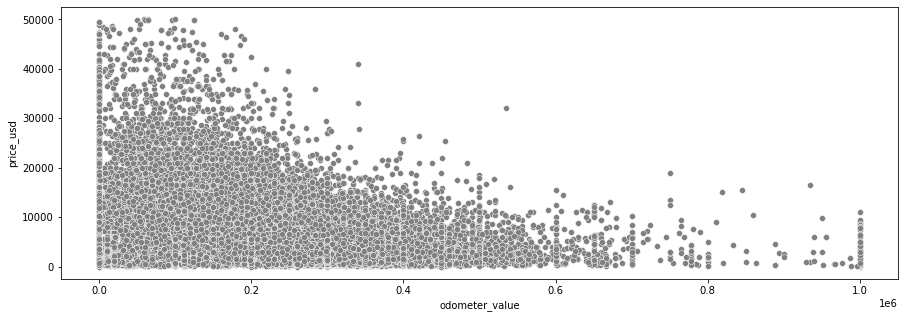

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['odometer_value'],y=df['price_usd'],color="grey")

<AxesSubplot:xlabel='year_produced', ylabel='price_usd'>

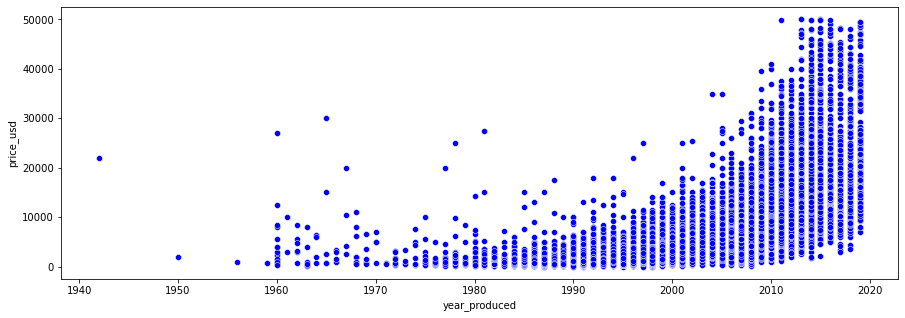

In [19]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['year_produced'],y=df['price_usd'],color="blue")


<AxesSubplot:xlabel='engine_capacity', ylabel='price_usd'>

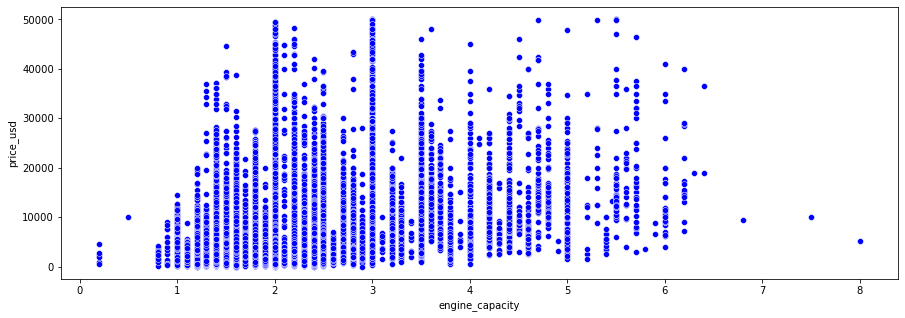

In [20]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['engine_capacity'],y=df['price_usd'],color="blue")

In [21]:
# using pearson for linear relationship and kendall for non-linear correlation

In [22]:
stats.pearsonr(df['odometer_value'],df['price_usd'])

(-0.42096537932176603, 0.0)

In [23]:
stats.pearsonr(df['year_produced'],df['price_usd'])

(0.7054393045004084, 0.0)

In [24]:
stats.kendalltau(df['engine_capacity'],df['price_usd'])

KendalltauResult(correlation=0.17418760860741284, pvalue=0.0)

In [25]:
# We will select odometer & year.

#### Checking  all categorical features for target class (price_usd)

In [26]:
df_2 = df_org.copy()
for x in df_2.columns:
    if(df[x].dtypes==object):
        print(x)

engine_fuel
body_type
state
drivetrain


In [27]:
# plt.figure(figsize=(40,5))
# series_1 = df_2['manufacturer_name'].value_counts()
# res = sns.barplot(x=series_1.index,y=series_1.values)
# res.set_xticklabels(labels=list(series_1.index), fontsize = 8)
# ""

In [28]:
# series_2 = df_2['model_name'].value_counts()
# res = sns.barplot(x=series_2.index,y=series_2.values)
# res.set_xticklabels(labels=list(series_2.index), fontsize = 8)
# ""

In [29]:
# first_group = series_2[series_2 < 500]
# first_group

In [30]:
# second_group = series_2[series_2 > 500]
# second_group

In [31]:
# df[df['Your_Column'].isin([3, 6])]

In [32]:
# series_3 = df_2['color'].value_counts()
# res = sns.barplot(x=series_3.index,y=series_3.values)
# res.set_xticklabels(labels=list(series_3.index), fontsize = 8)
# ""

''

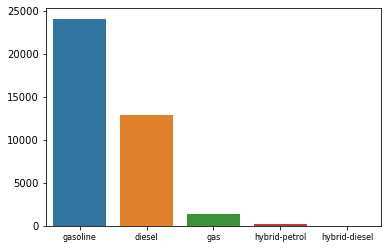

In [33]:
series_4 = df_2['engine_fuel'].value_counts()
res = sns.barplot(x=series_4.index,y=series_4.values)
res.set_xticklabels(labels=list(series_4.index), fontsize = 8)
""

''

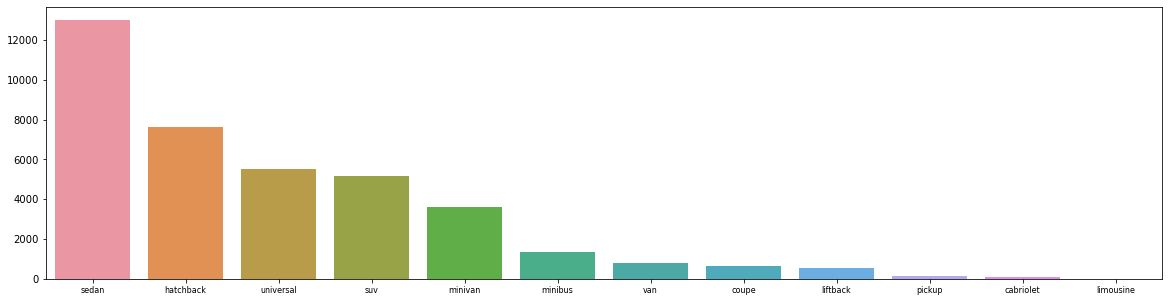

In [34]:
plt.figure(figsize=(20,5))
series_5 = df_2['body_type'].value_counts()
res = sns.barplot(x=series_5.index,y=series_5.values)
res.set_xticklabels(labels=list(series_5.index), fontsize = 8)
""

''

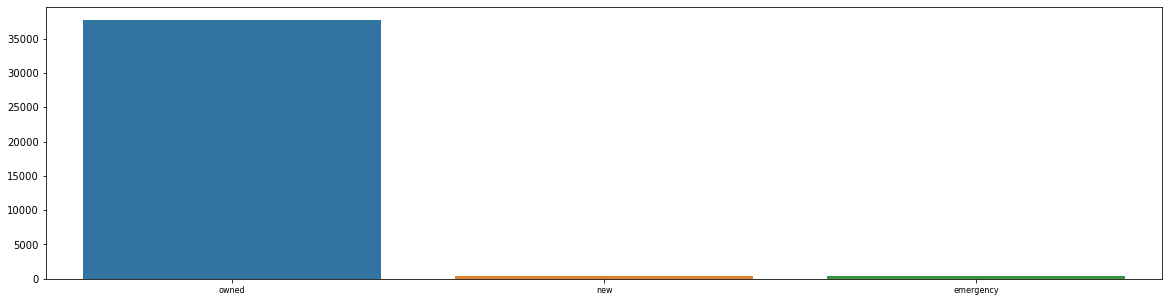

In [35]:
plt.figure(figsize=(20,5))
series_6 = df_2['state'].value_counts()
res = sns.barplot(x=series_6.index,y=series_6.values)
res.set_xticklabels(labels=list(series_6.index), fontsize = 8)
""

''

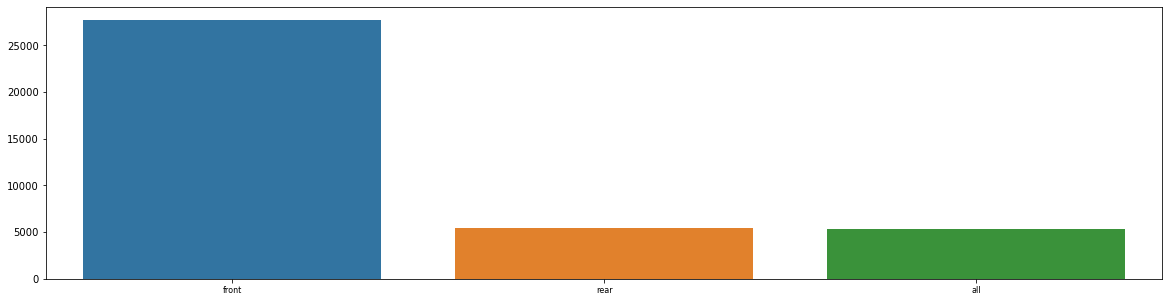

In [36]:
plt.figure(figsize=(20,5))
series_7 = df_2['drivetrain'].value_counts()
res = sns.barplot(x=series_7.index,y=series_7.values)
res.set_xticklabels(labels=list(series_7.index), fontsize = 8)
""

In [37]:
df_2 = df_2[['engine_fuel','body_type','state','drivetrain']]
df_2['price_usd'] = df_org['price_usd']
df_2

,engine_fuel,body_type,state,drivetrain,price_usd
0,gasoline,universal,owned,all,10900.00
1,gasoline,universal,owned,all,5000.00
2,gasoline,suv,owned,all,2800.00
3,gasoline,sedan,owned,all,9999.00
4,gasoline,universal,owned,all,2134.11
...,...,...,...,...,...
38526,gasoline,sedan,owned,front,2750.00
38527,diesel,hatchback,owned,front,4800.00
38528,gasoline,sedan,owned,front,4300.00
38529,gasoline,minivan,owned,front,4000.00


In [38]:
df_2['engine_fuel'].unique()

array(['gasoline', 'gas', 'diesel', 'hybrid-petrol', 'hybrid-diesel'],
      dtype=object)

In [39]:
import scipy.stats as stats

stats.f_oneway(df_2['price_usd'][df_2['engine_fuel'] == 'gasoline'],
               df_2['price_usd'][df_2['engine_fuel'] == 'gas'],
               df_2['price_usd'][df_2['engine_fuel'] == 'diesel'],
               df_2['price_usd'][df_2['engine_fuel'] == 'hybrid-petrol'],
               df_2['price_usd'][df_2['engine_fuel'] == 'hybrid-diesel'])

F_onewayResult(statistic=132.11765962349222, pvalue=2.7665496116044154e-112)

In [40]:
tukey = pairwise_tukeyhsd(endog=df['price_usd'],groups=df['engine_fuel'],alpha=0.05)


In [41]:
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
    group1        group2     meandiff  p-adj     lower      upper    reject
---------------------------------------------------------------------------
       diesel           gas -2883.5317   -0.0  -3382.0793  -2384.984   True
       diesel      gasoline -1115.4296   -0.0  -1305.5348  -925.3245   True
       diesel hybrid-diesel -4761.7103 0.8294 -17072.8348  7549.4141  False
       diesel hybrid-petrol  3829.9378   -0.0   2683.9666   4975.909   True
          gas      gasoline   1768.102   -0.0   1280.6615  2255.5426   True
          gas hybrid-diesel -1878.1787 0.9937 -14197.4824 10441.1251  False
          gas hybrid-petrol  6713.4695   -0.0   5482.7346  7944.2043   True
     gasoline hybrid-diesel -3646.2807 0.9283 -15956.9604   8664.399  False
     gasoline hybrid-petrol  4945.3674   -0.0   3804.1845  6086.5503   True
hybrid-diesel hybrid-petrol  8591.6481 0.3195  -3770.7927  20954.089  False
------------

In [42]:
# We select diesel , gas , gasoline , hybrid petrol

In [43]:
df_2['body_type'].unique()

array(['universal', 'suv', 'sedan', 'hatchback', 'liftback', 'minivan',
       'minibus', 'van', 'pickup', 'coupe', 'cabriolet', 'limousine'],
      dtype=object)

In [44]:
stats.f_oneway(df_2['price_usd'][df_2['body_type'] == 'universal'],
               df_2['price_usd'][df_2['body_type'] == 'suv'],
               df_2['price_usd'][df_2['body_type'] == 'sedan'],
               df_2['price_usd'][df_2['body_type'] == 'hatchback'],
               df_2['price_usd'][df_2['body_type'] == 'liftback'],
              df_2['price_usd'][df_2['body_type'] == 'liftback'],
              df_2['price_usd'][df_2['body_type'] == 'minivan'],
              df_2['price_usd'][df_2['body_type'] == 'minibus'],
              df_2['price_usd'][df_2['body_type'] == 'van'],
               df_2['price_usd'][df_2['body_type'] == 'pickup'],
              df_2['price_usd'][df_2['body_type'] == 'coupe'],
              df_2['price_usd'][df_2['body_type'] == 'cabriolet'],
              df_2['price_usd'][df_2['body_type'] == 'limousine'])

F_onewayResult(statistic=905.1105559585625, pvalue=0.0)

In [45]:
tukey = pairwise_tukeyhsd(endog=df['price_usd'],groups=df['body_type'],alpha=0.05)

In [46]:
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2   meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------
cabriolet     coupe -3517.7411    0.0  -5779.214 -1256.2681   True
cabriolet hatchback -6950.9057   -0.0  -9103.045 -4798.7664   True
cabriolet  liftback -3183.6715 0.0003 -5466.6754  -900.6677   True
cabriolet limousine -2821.4473 0.9099 -8588.0097   2945.115  False
cabriolet   minibus -2513.0469 0.0103 -4712.5767   -313.517   True
cabriolet   minivan -4844.7319   -0.0 -7008.5242 -2680.9395   True
cabriolet    pickup   772.6772 0.9987 -1920.5204  3465.8747  False
cabriolet     sedan -5171.3645   -0.0 -7319.1757 -3023.5532   True
cabriolet       suv  2796.7182 0.0014   639.5746  4953.8619   True
cabriolet universal -5960.5481   -0.0 -8116.7299 -3804.3664   True
cabriolet       van -4300.9847    0.0 -6539.8227 -2062.1468   True
    coupe hatchback -3433.1646   -0.0 -4189.9047 -2676.4245   

In [47]:
# We will select cabriolet , hatchback, minibus, sedan suv , universal

In [48]:
df_2['state'].unique()

array(['owned', 'emergency', 'new'], dtype=object)

In [49]:


stats.f_oneway(df_2['price_usd'][df_2['state'] == 'owned'],
               df_2['price_usd'][df_2['state'] == 'emergency'],
               df_2['price_usd'][df_2['state'] == 'new'])

F_onewayResult(statistic=2143.1552590033693, pvalue=0.0)

In [50]:
tukey = pairwise_tukeyhsd(endog=df['price_usd'],groups=df['state'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1  group2   meandiff  p-adj    lower       upper    reject
-----------------------------------------------------------------
emergency    new  23379.4665  -0.0  22370.7417  24388.1913   True
emergency  owned   4754.2932  -0.0   4007.9749   5500.6116   True
      new  owned -18625.1732  -0.0 -19311.7282 -17938.6183   True
-----------------------------------------------------------------


In [51]:
# We select all new , emeregency , owned

In [52]:
df_2['drivetrain'].unique()

array(['all', 'front', 'rear'], dtype=object)

In [53]:
stats.f_oneway(df_2['price_usd'][df_2['drivetrain'] == 'all'],
               df_2['price_usd'][df_2['drivetrain'] == 'front'],
               df_2['price_usd'][df_2['drivetrain'] == 'rear'])

F_onewayResult(statistic=4667.024543510438, pvalue=0.0)

In [54]:
tukey = pairwise_tukeyhsd(endog=df['price_usd'],groups=df['drivetrain'],alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
   all  front -8271.8727  -0.0 -8473.0437 -8070.7017   True
   all   rear -7501.8878  -0.0 -7762.1186 -7241.6569   True
 front   rear   769.9849  -0.0   568.9545   971.0154   True
-----------------------------------------------------------


In [55]:
# We will choose all,front,rear

#### Final Features selected from all types (categorical , numerical , binary) features

In [56]:
# 'transmission', 'feature_3', 'feature_6', 'feature_7','year_produced','odometer_value','drive_train','state'
# cabriolet , hatchback, minibus, sedan suv , universal
# diesel , gas , gasoline , hybrid petrol

In [57]:
df_org['transmission'] = df['transmission']
df_org.drop(labels=['engine_has_gas','engine_type','engine_capacity','has_warranty','is_exchangeable','feature_0','feature_1','feature_2','feature_4','feature_5','feature_8','feature_9'],axis=1,inplace=True)
df_org

,transmission,odometer_value,year_produced,engine_fuel,body_type,state,drivetrain,price_usd,feature_3,feature_6,feature_7
0,1,190000,2010,gasoline,universal,owned,all,10900.00,True,False,True
1,1,290000,2002,gasoline,universal,owned,all,5000.00,False,False,False
2,1,402000,2001,gasoline,suv,owned,all,2800.00,False,False,False
3,0,10000,1999,gasoline,sedan,owned,all,9999.00,False,False,False
4,1,280000,2001,gasoline,universal,owned,all,2134.11,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
38526,1,290000,2000,gasoline,sedan,owned,front,2750.00,False,False,False
38527,0,321000,2004,diesel,hatchback,owned,front,4800.00,False,False,False
38528,1,777957,2000,gasoline,sedan,owned,front,4300.00,False,False,False
38529,0,20000,2001,gasoline,minivan,owned,front,4000.00,False,False,False


In [58]:
def process_body_type(x):
    if(x=='cabriolet' or x=='hatchback' or x=='minibus' or x=='sedan suv' or x=='universal'):
        return x
    else:
        return "other"

def process_engine_fuel(x):
    if(x=='diesel' or x=='gas' or x=='gasoline' or x=='hybrid-petrol'):
        return x
    else:
        return 'other'

In [59]:
df_org['body_type'] = df_org['body_type'].apply(lambda x:process_body_type(x))
df_org['engine_fuel'] = df_org['engine_fuel'].apply(lambda x:process_engine_fuel(x))
df_org

,transmission,odometer_value,year_produced,engine_fuel,body_type,state,drivetrain,price_usd,feature_3,feature_6,feature_7
0,1,190000,2010,gasoline,universal,owned,all,10900.00,True,False,True
1,1,290000,2002,gasoline,universal,owned,all,5000.00,False,False,False
2,1,402000,2001,gasoline,other,owned,all,2800.00,False,False,False
3,0,10000,1999,gasoline,other,owned,all,9999.00,False,False,False
4,1,280000,2001,gasoline,universal,owned,all,2134.11,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
38526,1,290000,2000,gasoline,other,owned,front,2750.00,False,False,False
38527,0,321000,2004,diesel,hatchback,owned,front,4800.00,False,False,False
38528,1,777957,2000,gasoline,other,owned,front,4300.00,False,False,False
38529,0,20000,2001,gasoline,other,owned,front,4000.00,False,False,False


In [60]:
def oneHotEncoding_with_names(columnName,df):
    
    temp_df = pd.get_dummies(df[columnName],drop_first=False)
    for x in temp_df.columns:
        temp_df.rename(columns={x:columnName+'_'+str(x)},inplace=True)
    
    for x in temp_df.columns:
        df[x] = temp_df[x]
    
    df.drop(labels=columnName,axis=1,inplace=True)
    return df

for y in df_org.columns:
    if(df_org[y].dtype==object):
        oneHotEncoding_with_names(y,df_org)

df_org

,transmission,odometer_value,year_produced,price_usd,feature_3,feature_6,feature_7,engine_fuel_diesel,engine_fuel_gas,engine_fuel_gasoline,...,body_type_hatchback,body_type_minibus,body_type_other,body_type_universal,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
0,1,190000,2010,10900.00,True,False,True,0,0,1,...,0,0,0,1,0,0,1,1,0,0
1,1,290000,2002,5000.00,False,False,False,0,0,1,...,0,0,0,1,0,0,1,1,0,0
2,1,402000,2001,2800.00,False,False,False,0,0,1,...,0,0,1,0,0,0,1,1,0,0
3,0,10000,1999,9999.00,False,False,False,0,0,1,...,0,0,1,0,0,0,1,1,0,0
4,1,280000,2001,2134.11,True,False,False,0,0,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,1,290000,2000,2750.00,False,False,False,0,0,1,...,0,0,1,0,0,0,1,0,1,0
38527,0,321000,2004,4800.00,False,False,False,1,0,0,...,1,0,0,0,0,0,1,0,1,0
38528,1,777957,2000,4300.00,False,False,False,0,0,1,...,0,0,1,0,0,0,1,0,1,0
38529,0,20000,2001,4000.00,False,False,False,0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [61]:
df_org.columns

Index(['transmission', 'odometer_value', 'year_produced', 'price_usd',
       'feature_3', 'feature_6', 'feature_7', 'engine_fuel_diesel',
       'engine_fuel_gas', 'engine_fuel_gasoline', 'engine_fuel_hybrid-petrol',
       'engine_fuel_other', 'body_type_cabriolet', 'body_type_hatchback',
       'body_type_minibus', 'body_type_other', 'body_type_universal',
       'state_emergency', 'state_new', 'state_owned', 'drivetrain_all',
       'drivetrain_front', 'drivetrain_rear'],
      dtype='object')

In [62]:
df_org.drop(labels=['engine_fuel_other','body_type_other','state_emergency','drivetrain_all'],axis=1,inplace=True)


### Final Preprocesed and cleaned dataset for training / testing

In [63]:
df_org

,transmission,odometer_value,year_produced,price_usd,feature_3,feature_6,feature_7,engine_fuel_diesel,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-petrol,body_type_cabriolet,body_type_hatchback,body_type_minibus,body_type_universal,state_new,state_owned,drivetrain_front,drivetrain_rear
0,1,190000,2010,10900.00,True,False,True,0,0,1,0,0,0,0,1,0,1,0,0
1,1,290000,2002,5000.00,False,False,False,0,0,1,0,0,0,0,1,0,1,0,0
2,1,402000,2001,2800.00,False,False,False,0,0,1,0,0,0,0,0,0,1,0,0
3,0,10000,1999,9999.00,False,False,False,0,0,1,0,0,0,0,0,0,1,0,0
4,1,280000,2001,2134.11,True,False,False,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,1,290000,2000,2750.00,False,False,False,0,0,1,0,0,0,0,0,0,1,1,0
38527,0,321000,2004,4800.00,False,False,False,1,0,0,0,0,1,0,0,0,1,1,0
38528,1,777957,2000,4300.00,False,False,False,0,0,1,0,0,0,0,0,0,1,1,0
38529,0,20000,2001,4000.00,False,False,False,0,0,1,0,0,0,0,0,0,1,1,0


### Machine Learining Algorithms

In [64]:
# Logistic Regression, ANN, SVM,
# Decision Tree and Random Forest.

In [65]:
features = df_org.drop(labels=['price_usd'],axis=1)
target = df[['price_usd']]

In [66]:
features

,transmission,odometer_value,year_produced,feature_3,feature_6,feature_7,engine_fuel_diesel,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-petrol,body_type_cabriolet,body_type_hatchback,body_type_minibus,body_type_universal,state_new,state_owned,drivetrain_front,drivetrain_rear
0,1,190000,2010,True,False,True,0,0,1,0,0,0,0,1,0,1,0,0
1,1,290000,2002,False,False,False,0,0,1,0,0,0,0,1,0,1,0,0
2,1,402000,2001,False,False,False,0,0,1,0,0,0,0,0,0,1,0,0
3,0,10000,1999,False,False,False,0,0,1,0,0,0,0,0,0,1,0,0
4,1,280000,2001,True,False,False,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,1,290000,2000,False,False,False,0,0,1,0,0,0,0,0,0,1,1,0
38527,0,321000,2004,False,False,False,1,0,0,0,0,1,0,0,0,1,1,0
38528,1,777957,2000,False,False,False,0,0,1,0,0,0,0,0,0,1,1,0
38529,0,20000,2001,False,False,False,0,0,1,0,0,0,0,0,0,1,1,0


In [67]:
target

,price_usd
0,10900.00
1,5000.00
2,2800.00
3,9999.00
4,2134.11
...,...
38526,2750.00
38527,4800.00
38528,4300.00
38529,4000.00


In [68]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=12)


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [71]:
reg.score(x_train, y_train)

0.7023074753777857

In [72]:
from sklearn.ensemble import RandomForestRegressor
randForest_r = RandomForestRegressor(max_depth=10, random_state=0)
randForest_r.fit(x_train, y_train)


C:\Users\HP 14\AppData\Local\Temp\ipykernel_968\3505141694.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randForest_r.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, random_state=0)

In [73]:
randForest_r.score(x_train, y_train)

0.8685454161756924

In [74]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [75]:
dt.score(x_train, y_train)

0.9855131636992794

In [76]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [77]:
svr.score(x_train,y_train)

0.17038785128720324

In [78]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model.fit(x_train, y_train, epochs=60)

Epoch 1/60
963/963 [==============================] - 3s 3ms/step - loss: 2773.7400 - mae: 2773.7400
Epoch 2/60
963/963 [==============================] - 2s 2ms/step - loss: 2188.2283 - mae: 2188.2283
Epoch 3/60
963/963 [==============================] - 2s 2ms/step - loss: 2039.0098 - mae: 2039.0098
Epoch 4/60
963/963 [==============================] - 2s 2ms/step - loss: 1987.2377 - mae: 1987.2377
Epoch 5/60
963/963 [==============================] - 2s 2ms/step - loss: 1915.0862 - mae: 1915.0862
Epoch 6/60
963/963 [==============================] - 2s 2ms/step - loss: 1872.8383 - mae: 1872.8383
Epoch 7/60
963/963 [==============================] - 2s 3ms/step - loss: 1825.5996 - mae: 1825.5996
Epoch 8/60
963/963 [==============================] - 2s 3ms/step - loss: 1813.6797 - mae: 1813.6797
Epoch 9/60
963/963 [==============================] - 2s 2ms/step - loss: 1790.3405 - mae: 1790.3405
Epoch 10/60
963/963 [==============================] - 2s 2ms/step - loss: 1790.4032 - mae:

In [79]:
p = model.predict(x_train)
SS_res =  K.sum(K.square( y_train-p))
SS_tot = K.sum(K.square( y_train - np.mean(y_train) ) )
print( 1 - SS_res/(SS_tot + K.epsilon()) )

tf.Tensor(0.8149257524582667, shape=(), dtype=float64)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Test Results

In [80]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [81]:
preds = reg.predict(x_test)
print("Linear Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

Linear Regression
MAPE :  1.3193333319283582
R2-Score :  0.7109498584499652
MAE:  2214.3786958111255
MSE :  12308485.256707342
RMSE :  3508.345088030444


In [82]:
preds = randForest_r.predict(x_test)
print("Random Forest Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

Random Forest Regression
MAPE :  0.9777590510895993
R2-Score :  0.8308417782708473
MAE:  1601.4920020153534
MSE :  7203184.426891888
RMSE :  2683.874890320316


In [83]:
preds = dt.predict(x_test)
print("Decision Tree Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

Decision Tree Regression
MAPE :  1.0451582020910215
R2-Score :  0.7012016012669657
MAE:  2086.431569624871
MSE :  12723590.674653552
RMSE :  3567.014252095659


In [84]:
preds = svr.predict(x_test)
print("SVM Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

SVM Regression
MAPE :  2.6345659480873636
R2-Score :  0.16648006031004825
MAE:  3649.694830503943
MSE :  35493384.75957624
RMSE :  5957.632479397856


In [85]:
preds = model.predict(x_test)
print("ANN Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

ANN Regression
MAPE :  0.8100156188047583
R2-Score :  0.8156429609489805
MAE:  1617.9910603574374
MSE :  7850388.465341402
RMSE :  2801.8544689796795


### Applying PCA

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
# x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=12)

scaler.fit(features)
features_p = scaler.transform(features)

pca = PCA(n_components=6,svd_solver="full")
features_p = pca.fit_transform(features_p)

features_p = pd.DataFrame(features_p)

x_train, x_test, y_train, y_test = train_test_split(features_p, target, test_size=0.20, random_state=12)


In [88]:
x_train

,0,1,2,3,4,5
13771,-0.484282,-0.897003,0.370643,-1.769250,-1.359703,0.039698
13171,-0.263903,0.954042,-0.617956,-0.053556,0.205992,-0.231654
36110,-1.319766,-0.386471,0.633376,-1.613337,-1.450891,0.146042
28477,-0.893143,-0.550657,-0.805773,2.916396,-0.006856,-0.384606
6610,-1.168436,-1.001696,0.818455,-1.040454,-0.310231,-0.074251
...,...,...,...,...,...,...
12108,-0.093995,-0.492559,0.378851,0.503925,1.485201,4.598378
9475,-1.268390,-1.062176,0.785081,-1.003123,-0.287034,-0.068960
36482,-1.499377,-1.607703,1.013266,-1.522528,1.627444,-0.832426
19709,-1.201594,-1.465039,1.120301,-1.651809,1.560272,-0.848586


In [89]:
y_train

,price_usd
13773,4700.0
13173,1400.0
36120,5950.0
28486,6100.0
6610,2950.0
...,...
12110,7990.0
9477,3700.0
36492,4100.0
19711,7950.0


In [90]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

0.6241139642509139

In [91]:
from sklearn.ensemble import RandomForestRegressor
randForest_r = RandomForestRegressor(max_depth=10, random_state=0)
randForest_r.fit(x_train, y_train)
randForest_r.score(x_train, y_train)

C:\Users\HP 14\AppData\Local\Temp\ipykernel_968\66356846.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randForest_r.fit(x_train, y_train)


0.849877932651892

In [92]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
dt.score(x_train, y_train)

0.9855131636992794

In [93]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23496477579040265

In [94]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model.fit(x_train, y_train, epochs=60)

p = model.predict(x_train)
SS_res =  K.sum(K.square( y_train-p))
SS_tot = K.sum(K.square( y_train - np.mean(y_train) ) )
print( 1 - SS_res/(SS_tot + K.epsilon()) )

Epoch 1/60
963/963 [==============================] - 3s 2ms/step - loss: 2859.0205 - mae: 2859.0205
Epoch 2/60
963/963 [==============================] - 2s 2ms/step - loss: 2328.0566 - mae: 2328.0566
Epoch 3/60
963/963 [==============================] - 2s 2ms/step - loss: 2322.1924 - mae: 2322.1924
Epoch 4/60
963/963 [==============================] - 2s 2ms/step - loss: 2326.9419 - mae: 2326.9419
Epoch 5/60
963/963 [==============================] - 2s 2ms/step - loss: 2302.6396 - mae: 2302.6396
Epoch 6/60
963/963 [==============================] - 2s 2ms/step - loss: 2291.1475 - mae: 2291.1475
Epoch 7/60
963/963 [==============================] - 2s 2ms/step - loss: 2305.6260 - mae: 2305.6260
Epoch 8/60
963/963 [==============================] - 2s 2ms/step - loss: 2295.4512 - mae: 2295.4512
Epoch 9/60
963/963 [==============================] - 2s 2ms/step - loss: 2283.9749 - mae: 2283.9749
Epoch 10/60
963/963 [==============================] - 2s 2ms/step - loss: 2284.8472 - mae:

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Test Results (PCA)

In [95]:
preds = reg.predict(x_test)
print("Linear Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

Linear Regression
MAPE :  1.5393405169138323
R2-Score :  0.633258730689273
MAE:  2516.316716095277
MSE :  15616769.748427322
RMSE :  3951.8058844567913


In [96]:
preds = randForest_r.predict(x_test)
print("Random Forest Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

Random Forest Regression
MAPE :  1.0956532171799043
R2-Score :  0.7998942339488297
MAE:  1768.2585653951692
MSE :  8521009.047133124
RMSE :  2919.076745673728


In [97]:
preds = dt.predict(x_test)
print("Decision Tree Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

Decision Tree Regression
MAPE :  1.0682415565401897
R2-Score :  0.6779510920954506
MAE:  2160.5604015671265
MSE :  13713656.093109665
RMSE :  3703.195389539913


In [98]:
preds = svr.predict(x_test)
print("SVM Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

SVM Regression
MAPE :  2.3876041118605844
R2-Score :  0.22778266653414558
MAE:  3341.0735235892057
MSE :  32882964.917327434
RMSE :  5734.3670023227005


In [99]:
preds = model.predict(x_test)
print("ANN Regression")
print("MAPE : ",mean_absolute_percentage_error(y_test,preds))
print("R2-Score : ",r2_score(y_test,preds))
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE : ",mean_squared_error(y_test,preds))
print("RMSE : ",mean_squared_error(y_test,preds,squared=False))

ANN Regression
MAPE :  0.8973004334604617
R2-Score :  0.6971172333937667
MAE:  2009.3568922097259
MSE :  12897513.377063079
RMSE :  3591.310815992272


### Kfold validation

In [100]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [101]:
features = df_org.drop(labels=['price_usd'],axis=1)
target = df[['price_usd']]

In [102]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [103]:
reg = LinearRegression()
svr = SVR(kernel = 'rbf')
dt = DecisionTreeRegressor(random_state=0)
randForest_r = RandomForestRegressor(max_depth=10, random_state=0)

In [131]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

In [105]:
scores = cross_val_score(reg, features, target, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))

2214.474422763771

In [106]:
scores = cross_val_score(randForest_r, features, target, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))

1593.407646625347

In [107]:
scores = cross_val_score(dt, features, target, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))

2106.5320316212647

In [108]:
scores = cross_val_score(svr, features, target, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))

3905.213590464084

In [109]:
scores = cross_val_score(reg, features, target, scoring='r2',
                         cv=cv, n_jobs=-1)

mean(absolute(scores))

0.7039512266634363

In [110]:
scores = cross_val_score(randForest_r, features, target, scoring='r2',
                         cv=cv, n_jobs=-1)

mean(absolute(scores))

0.8276104340455666

In [111]:
scores = cross_val_score(dt, features, target, scoring='r2',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))

0.6903837264174143

In [112]:
scores = cross_val_score(svr, features, target, scoring='r2',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))

0.10316584174039316

In [126]:
# scores = cross_val_score(model, features, target, scoring='r2',
#                          cv=cv, n_jobs=-1)
# mean(absolute(scores))

In [125]:
c = 0
l = 0
for train_index,test_index in KFold(10).split(features.values):
  x_train,x_test=features.values[train_index],features.values[test_index]
  y_train,y_test=target.values[train_index],target.values[test_index]
  
  x_train = np.asarray(x_train).astype('float32')
  x_test = np.asarray(x_test).astype('float32')
  y_train = np.asarray(y_train).astype('float32')
  y_test = np.asarray(y_test).astype('float32')

  model.fit(x_train, y_train,epochs=60,verbose=False)
  c=c+1
#   l = l + model.evaluate(x_test,y_test)
  print('Model evaluation ',model.evaluate(x_test,y_test))

121/121 [==============================] - 0s 1ms/step - loss: 31780052992.0000 - mae: 31780052992.0000
Model evaluation  [31780052992.0, 31780052992.0]
121/121 [==============================] - 0s 1ms/step - loss: 50752976.0000 - mae: 50752976.0000
Model evaluation  [50752976.0, 50752976.0]
121/121 [==============================] - 0s 1ms/step - loss: 97885.3203 - mae: 97885.3203
Model evaluation  [97885.3203125, 97885.3203125]
121/121 [==============================] - 0s 1ms/step - loss: 4774.7939 - mae: 4774.7939
Model evaluation  [4774.7939453125, 4774.7939453125]
121/121 [==============================] - 0s 1ms/step - loss: 4750.8398 - mae: 4750.8398
Model evaluation  [4750.83984375, 4750.83984375]
121/121 [==============================] - 0s 1ms/step - loss: 5252.1045 - mae: 5252.1045
Model evaluation  [5252.1044921875, 5252.1044921875]
121/121 [==============================] - 0s 1ms/step - loss: 5301.7104 - mae: 5301.7104
Model evaluation  [5301.71044921875, 5301.71044921

In [127]:
# (31780052992+50752976+97885+4744+4750+5252+5301+5366+6744+3727)/10

3183093973.7

In [132]:
c = 0
l = 0
for train_index,test_index in KFold(10).split(features.values):
  x_train,x_test=features.values[train_index],features.values[test_index]
  y_train,y_test=target.values[train_index],target.values[test_index]
  
  x_train = np.asarray(x_train).astype('float32')
  x_test = np.asarray(x_test).astype('float32')
  y_train = np.asarray(y_train).astype('float32')
  y_test = np.asarray(y_test).astype('float32')

  model.fit(x_train, y_train,epochs=60,verbose=False)
  c=c+1
#   l = l + model.evaluate(x_test,y_test)
  print('Model evaluation ',model.evaluate(x_test,y_test))

ValueError: in user code:

    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 864, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 957, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 438, in update_state
        self.build(y_pred, y_true)
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 358, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 484, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 484, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 503, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\metrics.py", line 4262, in get
        return deserialize(str(identifier))
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\metrics.py", line 4218, in deserialize
        return deserialize_keras_object(
    File "C:\Users\HP 14\AppData\Roaming\Python\Python39\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: r_square. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
